## initiate a classifier

In [61]:
import bnn
print(bnn.available_params(bnn.NETWORK_CNVW1A1))

classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW1A1, 'road-signs', bnn.RUNTIME_HW)

['road-signs', 'streetview', 'cifar10']


## list the available classifiers

In [62]:
print(classifier.classes)

['20 Km/h', '30 Km/h', '50 Km/h', '60 Km/h', '70 Km/h', '80 Km/h', 'End 80 Km/h', '100 Km/h', '120 Km/h', 'No overtaking', 'No overtaking for large trucks', 'Priority crossroad', 'Priority road', 'Give way', 'Stop', 'No vehicles', 'Prohibited for vehicles with a permitted gross weight over 3.5t including their trailers, and for tractors except passenger cars and buses', 'No entry for vehicular traffic', 'Danger Ahead', 'Bend to left', 'Bend to right', 'Double bend (first to left)', 'Uneven road', 'Road slippery when wet or dirty', 'Road narrows (right)', 'Road works', 'Traffic signals', 'Pedestrians in road ahead', 'Children crossing ahead', 'Bicycles prohibited', 'Risk of snow or ice', 'Wild animals', 'End of all speed and overtaking restrictions', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Ahead or right only', 'Ahead or left only', 'Pass by on right', 'Pass by on left', 'Roundabout', 'End of no-overtaking zone', 'End of no-overtaking zone for vehicles with a permitted gro

## open image

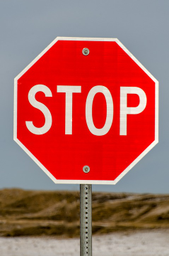

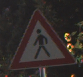

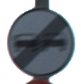

In [63]:
from PIL import Image
import numpy as np
from os import listdir
from os.path import isfile, join
from IPython.display import display

imgList = [f for f in listdir("/home/xilinx/jupyter_notebooks/bnn/pictures/road_signs/") if isfile(join("/home/xilinx/jupyter_notebooks/bnn/pictures/road_signs/", f))]

images = []
   
for imgFile in imgList:
	img = Image.open("/home/xilinx/jupyter_notebooks/bnn/pictures/road_signs/" + imgFile)
	images.append(img)    
	img.thumbnail((256, 256), Image.ANTIALIAS)
	display(img) 

## launching BNN in hardware

In [64]:
results = classifier.classify_images(images)
print("Identified classes: {0}".format(results))
for index in results:
    print("Identified class name: {0}".format((classifier.class_name(index))))

Inference took 2743.00 microseconds, 914.33 usec per image
Classification rate: 1093.69 images per second
Identified classes: [14 27 41]
Identified class name: Stop
Identified class name: Pedestrians in road ahead
Identified class name: End of no-overtaking zone


## launching BNN in software

In [65]:
sw_class = bnn.CnvClassifier(bnn.NETWORK_CNVW1A1,"road-signs", bnn.RUNTIME_SW)

results = sw_class.classify_images(images)
print("Identified classes: {0}".format(results))
for index in results:
    print("Identified class name: {0}".format((classifier.class_name(index))))

Inference took 4908418.88 microseconds, 1636139.62 usec per image
Classification rate: 0.61 images per second
Identified classes: [14 27 41]
Identified class name: Stop
Identified class name: Pedestrians in road ahead
Identified class name: End of no-overtaking zone


## now locate objects in the image

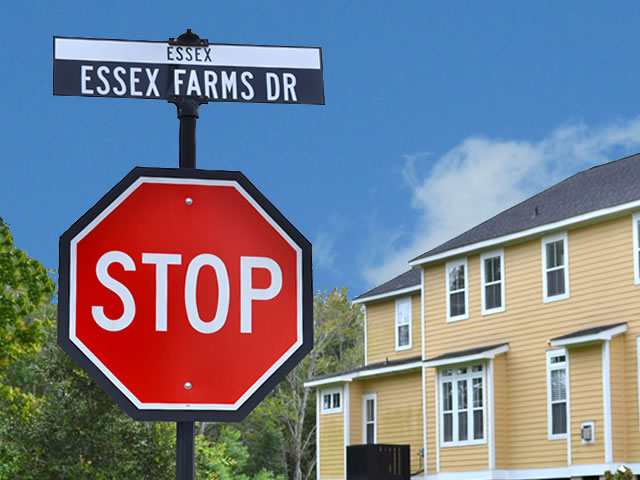

In [66]:
from PIL import Image
image_file = "/home/xilinx/jupyter_notebooks/bnn/pictures/page-street.jpg"
im = Image.open(image_file)
im

In [67]:
images = []
bounds = []
for s in [64,96]:
    stride = s // 4
    x_tiles = im.width // stride
    y_tiles = im.height // stride
    
    for j in range(y_tiles):
        for i in range(x_tiles):
            bound = (stride * i, stride * j, stride * i + s, stride * j + s)
            if bound[2] <= im.width and bound[3] < im.height:
                c = im.crop(bound)
                images.append(c)
                bounds.append(bound)

print(len(images))

1330


Inference took 437709.02 microseconds, 329.10 usec per image
Classification rate: 3038.55 images per second


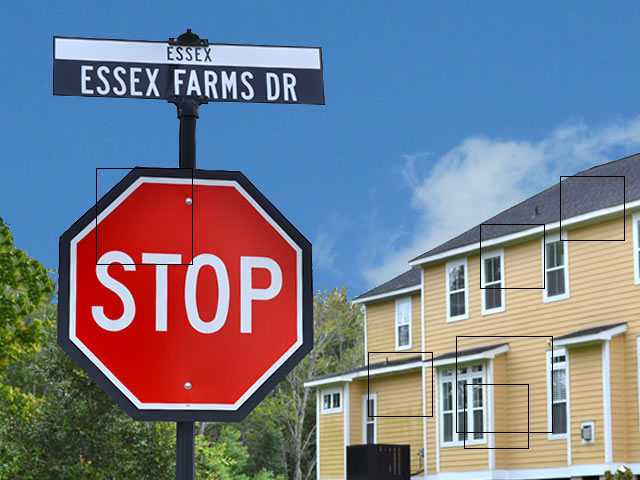

In [68]:
results = classifier.classify_images(images)
stop = results == 14
indicies = []
indicies = stop.nonzero()[0]
from PIL import ImageDraw
im2 = Image.open(image_file)
draw2 = ImageDraw.Draw(im2)
for i in indicies:
    draw2.rectangle(bounds[i], outline='black')

im2

Inference took 437706.99 microseconds, 329.10 usec per image
Classification rate: 3038.56 images per second


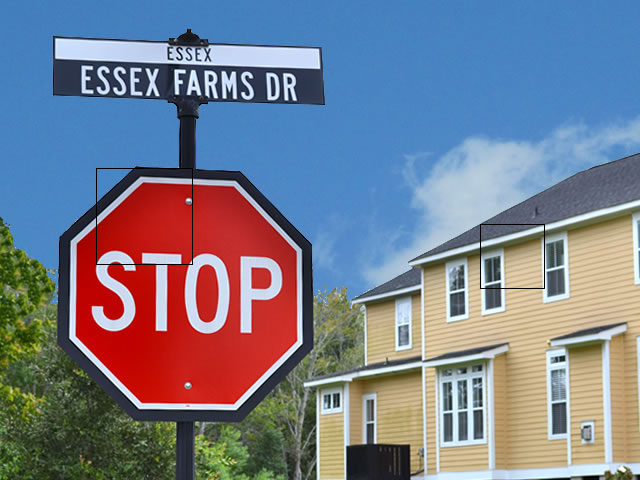

In [69]:
result = classifier.classify_images_details(images)
result=result.reshape(len(images),43)
from PIL import ImageDraw

draw = ImageDraw.Draw(im)
i=0
for image in images:
    if result[i][14] > 340:
        draw.rectangle(bounds[i], outline='black')
    i=i+1    
    
im